# Part 1
## Task 1
See **pytorch_mlp.py** and **pytorch_train_mlp.py** for detail.
## Task 2

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from mlp_numpy import MLP as NumpyMLP
from pytorch_mlp import MLP as PyTorchMLP
from train_mlp_numpy import train as train_numpy
from pytorch_train_mlp import train as train_pytorch

DNN_HIDDEN_UNITS_DEFAULT = '20'
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 1500
EVAL_FREQ_DEFAULT = 10

### Test MLPs with "make_moons" dataset.

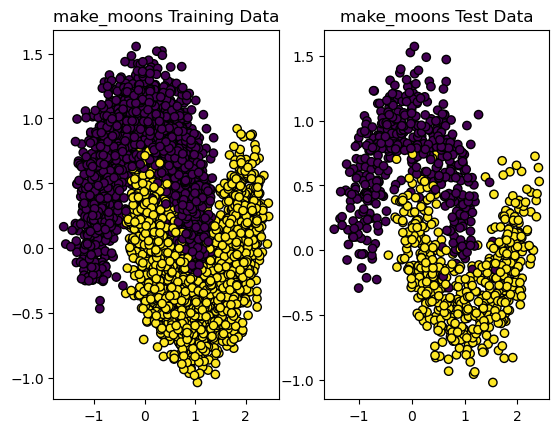

In [5]:
X, y = make_moons(n_samples=5000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure()
plt.subplot(1, 2, 1)
plt.title('make_moons Training Data')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.subplot(1, 2, 2)
plt.title('make_moons Test Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k')
plt.show()

y_train_one_hot = np.zeros((y_train.size, y_train.max() + 1))
y_train_one_hot[np.arange(y_train.size), y_train] = 1
y_test_one_hot = np.zeros((y_test.size, y_test.max() + 1))
y_test_one_hot[np.arange(y_test.size), y_test] = 1


In [6]:
train_loss_np, train_acc_np, test_loss_np, test_acc_np = train_numpy(
    X_train,
    X_test,
    y_train_one_hot,
    y_test_one_hot,
    DNN_HIDDEN_UNITS_DEFAULT,
    LEARNING_RATE_DEFAULT,
    MAX_EPOCHS_DEFAULT,
    EVAL_FREQ_DEFAULT,
    True,
    100,
    'make_moons')

train_loss_pt, train_acc_pt, test_loss_pt, test_acc_pt = train_pytorch(
    X_train,
    X_test,
    y_train_one_hot,
    y_test_one_hot,
    DNN_HIDDEN_UNITS_DEFAULT,
    LEARNING_RATE_DEFAULT,
    MAX_EPOCHS_DEFAULT,
    EVAL_FREQ_DEFAULT,
    100,
    'make_moons')

print(f'Test accuracy on dataset make_moons - NumPy Accuracy: {test_acc_np[-1] * 100:.4f}%, PyTorch Accuracy: {test_acc_pt[-1] * 100:.4f}%')

Step: 0, Loss: 0.7381, Accuracy: 42.70%
Step: 10, Loss: 0.5600, Accuracy: 73.50%
Step: 20, Loss: 0.5014, Accuracy: 82.30%
Step: 30, Loss: 0.4737, Accuracy: 83.90%
Step: 40, Loss: 0.4542, Accuracy: 83.70%
Step: 50, Loss: 0.4388, Accuracy: 84.30%
Step: 60, Loss: 0.4259, Accuracy: 84.90%
Step: 70, Loss: 0.4148, Accuracy: 85.00%
Step: 80, Loss: 0.4051, Accuracy: 84.90%
Step: 90, Loss: 0.3965, Accuracy: 85.00%
Step: 100, Loss: 0.3888, Accuracy: 85.50%
Step: 110, Loss: 0.3819, Accuracy: 85.80%
Step: 120, Loss: 0.3755, Accuracy: 85.80%
Step: 130, Loss: 0.3697, Accuracy: 86.00%
Step: 140, Loss: 0.3644, Accuracy: 86.00%
Step: 150, Loss: 0.3595, Accuracy: 86.10%
Step: 160, Loss: 0.3550, Accuracy: 86.10%
Step: 170, Loss: 0.3508, Accuracy: 86.20%
Step: 180, Loss: 0.3469, Accuracy: 86.20%
Step: 190, Loss: 0.3432, Accuracy: 86.20%
Step: 200, Loss: 0.3398, Accuracy: 86.30%
Step: 210, Loss: 0.3366, Accuracy: 86.30%
Step: 220, Loss: 0.3335, Accuracy: 86.30%
Step: 230, Loss: 0.3307, Accuracy: 86.30%
Ste

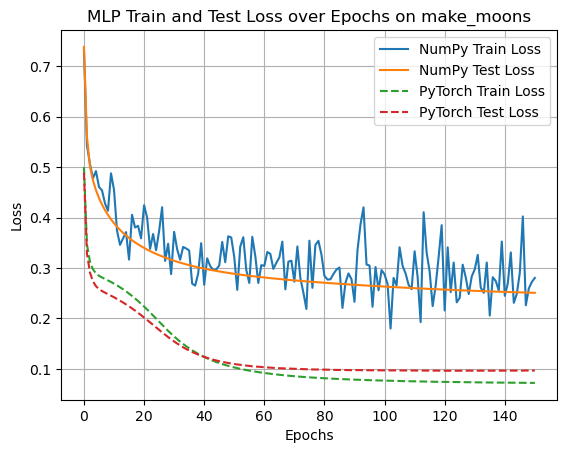

In [7]:
plt.figure()
plt.plot(train_loss_np, label='NumPy Train Loss')
plt.plot(test_loss_np, label='NumPy Test Loss')
plt.plot(train_loss_pt, label='PyTorch Train Loss', linestyle='--')
plt.plot(test_loss_pt, label='PyTorch Test Loss', linestyle='--')
plt.title('MLP Train and Test Loss over Epochs on make_moons')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

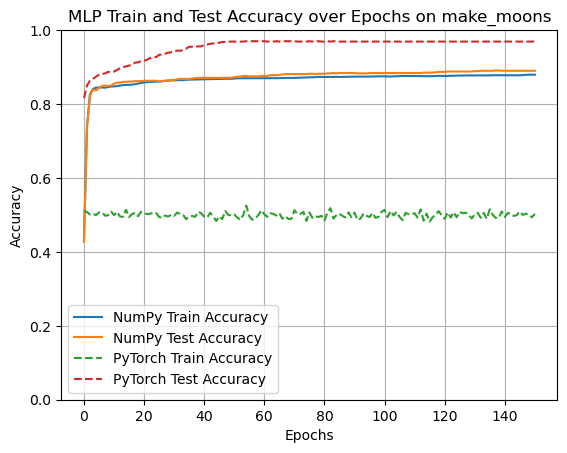

In [8]:
plt.figure()
plt.plot(train_acc_np, label='NumPy Train Accuracy')
plt.plot(test_acc_np, label='NumPy Test Accuracy')
plt.plot(train_acc_pt, label='PyTorch Train Accuracy', linestyle='--')
plt.plot(test_acc_pt, label='PyTorch Test Accuracy', linestyle='--')
plt.title('MLP Train and Test Accuracy over Epochs on make_moons')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

### Test MLPs with "make_circles" dataset.

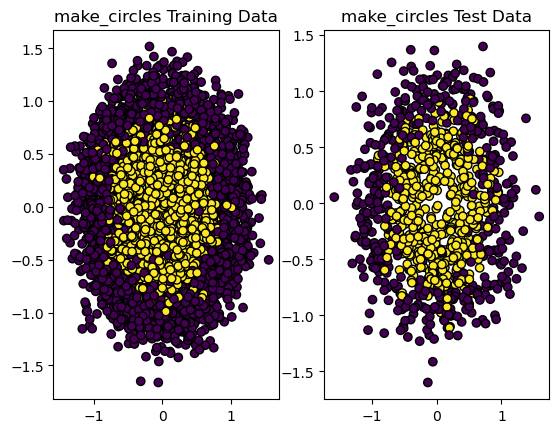

In [9]:
X, y = make_circles(n_samples=5000, noise=0.2, factor=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure()
plt.subplot(1, 2, 1)
plt.title('make_circles Training Data')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.subplot(1, 2, 2)
plt.title('make_circles Test Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k')
plt.show()

y_train_one_hot = np.zeros((y_train.size, y_train.max() + 1))
y_train_one_hot[np.arange(y_train.size), y_train] = 1
y_test_one_hot = np.zeros((y_test.size, y_test.max() + 1))
y_test_one_hot[np.arange(y_test.size), y_test] = 1

In [10]:
train_loss_np, train_acc_np, test_loss_np, test_acc_np = train_numpy(
    X_train,
    X_test,
    y_train_one_hot,
    y_test_one_hot,
    DNN_HIDDEN_UNITS_DEFAULT,
    LEARNING_RATE_DEFAULT,
    MAX_EPOCHS_DEFAULT,
    EVAL_FREQ_DEFAULT,
    True,
    100,
    'make_circles')

train_loss_pt, train_acc_pt, test_loss_pt, test_acc_pt = train_pytorch(
    X_train,
    X_test,
    y_train_one_hot,
    y_test_one_hot,
    DNN_HIDDEN_UNITS_DEFAULT,
    LEARNING_RATE_DEFAULT,
    MAX_EPOCHS_DEFAULT,
    EVAL_FREQ_DEFAULT,
    100,
    'make_circles')

print(f'Test accuracy on dataset make_circles - NumPy Accuracy: {test_acc_np[-1] * 100:.4f}%, PyTorch Accuracy: {test_acc_pt[-1] * 100:.4f}%')

Step: 0, Loss: 0.6652, Accuracy: 47.80%
Step: 10, Loss: 0.6465, Accuracy: 53.90%
Step: 20, Loss: 0.6328, Accuracy: 64.50%
Step: 30, Loss: 0.6209, Accuracy: 73.80%
Step: 40, Loss: 0.6078, Accuracy: 82.30%
Step: 50, Loss: 0.5967, Accuracy: 85.80%
Step: 60, Loss: 0.5890, Accuracy: 86.30%
Step: 70, Loss: 0.5821, Accuracy: 86.60%
Step: 80, Loss: 0.5747, Accuracy: 86.70%
Step: 90, Loss: 0.5677, Accuracy: 86.80%
Step: 100, Loss: 0.5614, Accuracy: 87.50%
Step: 110, Loss: 0.5561, Accuracy: 87.60%
Step: 120, Loss: 0.5514, Accuracy: 87.60%
Step: 130, Loss: 0.5469, Accuracy: 87.50%
Step: 140, Loss: 0.5426, Accuracy: 87.60%
Step: 150, Loss: 0.5383, Accuracy: 87.50%
Step: 160, Loss: 0.5342, Accuracy: 87.60%
Step: 170, Loss: 0.5302, Accuracy: 87.60%
Step: 180, Loss: 0.5262, Accuracy: 87.70%
Step: 190, Loss: 0.5224, Accuracy: 87.80%
Step: 200, Loss: 0.5186, Accuracy: 87.80%
Step: 210, Loss: 0.5149, Accuracy: 87.80%
Step: 220, Loss: 0.5112, Accuracy: 87.90%
Step: 230, Loss: 0.5078, Accuracy: 87.80%
Ste

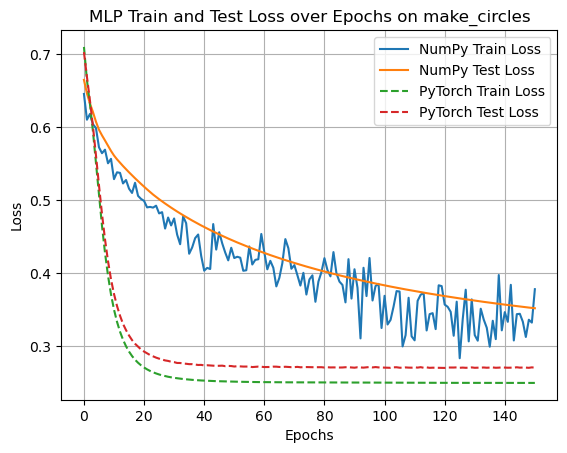

In [11]:
plt.figure()
plt.plot(train_loss_np, label='NumPy Train Loss')
plt.plot(test_loss_np, label='NumPy Test Loss')
plt.plot(train_loss_pt, label='PyTorch Train Loss', linestyle='--')
plt.plot(test_loss_pt, label='PyTorch Test Loss', linestyle='--')
plt.title('MLP Train and Test Loss over Epochs on make_circles')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

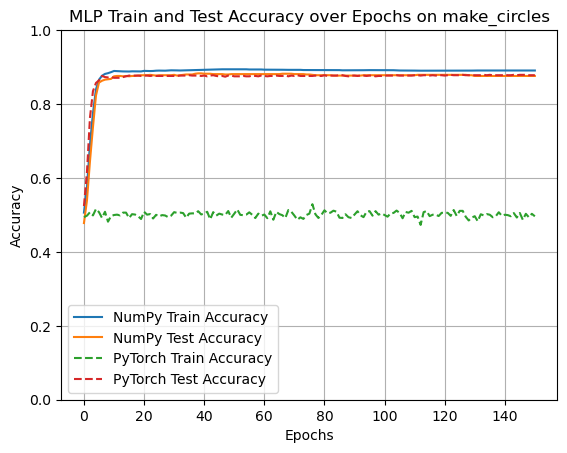

In [12]:
plt.figure()
plt.plot(train_acc_np, label='NumPy Train Accuracy')
plt.plot(test_acc_np, label='NumPy Test Accuracy')
plt.plot(train_acc_pt, label='PyTorch Train Accuracy', linestyle='--')
plt.plot(test_acc_pt, label='PyTorch Test Accuracy', linestyle='--')
plt.title('MLP Train and Test Accuracy over Epochs on make_circles')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

### Test MLPs with "make_classification" dataset.

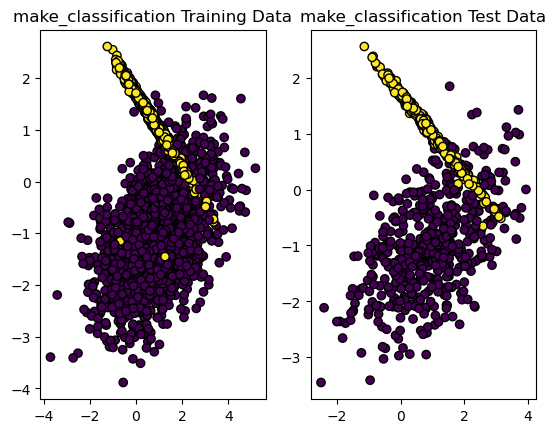

In [13]:
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2, n_redundant=0,
                                   n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure()
plt.subplot(1, 2, 1)
plt.title('make_classification Training Data')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.subplot(1, 2, 2)
plt.title('make_classification Test Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k')
plt.show()

y_train_one_hot = np.zeros((y_train.size, y_train.max() + 1))
y_train_one_hot[np.arange(y_train.size), y_train] = 1
y_test_one_hot = np.zeros((y_test.size, y_test.max() + 1))
y_test_one_hot[np.arange(y_test.size), y_test] = 1

In [14]:
train_loss_np, train_acc_np, test_loss_np, test_acc_np = train_numpy(
    X_train,
    X_test,
    y_train_one_hot,
    y_test_one_hot,
    DNN_HIDDEN_UNITS_DEFAULT,
    LEARNING_RATE_DEFAULT,
    MAX_EPOCHS_DEFAULT,
    EVAL_FREQ_DEFAULT,
    True,
    100,
    'make_classification')

train_loss_pt, train_acc_pt, test_loss_pt, test_acc_pt = train_pytorch(
    X_train,
    X_test,
    y_train_one_hot,
    y_test_one_hot,
    DNN_HIDDEN_UNITS_DEFAULT,
    LEARNING_RATE_DEFAULT,
    MAX_EPOCHS_DEFAULT,
    EVAL_FREQ_DEFAULT,
    100,
    'make_classification')

print(f'Test accuracy on dataset make_classification - NumPy Accuracy: {test_acc_np[-1] * 100:.4f}%, PyTorch Accuracy: {test_acc_pt[-1] * 100:.4f}%')

Step: 0, Loss: 0.5969, Accuracy: 49.70%
Step: 10, Loss: 0.4092, Accuracy: 88.60%
Step: 20, Loss: 0.3671, Accuracy: 91.30%
Step: 30, Loss: 0.3360, Accuracy: 91.80%
Step: 40, Loss: 0.3084, Accuracy: 91.70%
Step: 50, Loss: 0.2842, Accuracy: 91.80%
Step: 60, Loss: 0.2633, Accuracy: 91.70%
Step: 70, Loss: 0.2471, Accuracy: 91.90%
Step: 80, Loss: 0.2405, Accuracy: 91.90%
Step: 90, Loss: 0.2359, Accuracy: 91.90%
Step: 100, Loss: 0.2324, Accuracy: 92.00%
Step: 110, Loss: 0.2296, Accuracy: 92.00%
Step: 120, Loss: 0.2273, Accuracy: 92.00%
Step: 130, Loss: 0.2253, Accuracy: 92.00%
Step: 140, Loss: 0.2238, Accuracy: 92.00%
Step: 150, Loss: 0.2224, Accuracy: 92.00%
Step: 160, Loss: 0.2213, Accuracy: 92.00%
Step: 170, Loss: 0.2203, Accuracy: 92.00%
Step: 180, Loss: 0.2194, Accuracy: 92.10%
Step: 190, Loss: 0.2185, Accuracy: 92.10%
Step: 200, Loss: 0.2178, Accuracy: 92.10%
Step: 210, Loss: 0.2171, Accuracy: 92.10%
Step: 220, Loss: 0.2164, Accuracy: 92.10%
Step: 230, Loss: 0.2158, Accuracy: 92.10%
Ste

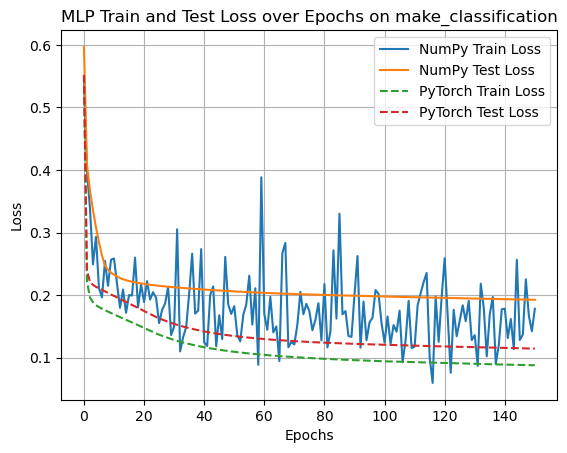

In [15]:
plt.figure()
plt.plot(train_loss_np, label='NumPy Train Loss')
plt.plot(test_loss_np, label='NumPy Test Loss')
plt.plot(train_loss_pt, label='PyTorch Train Loss', linestyle='--')
plt.plot(test_loss_pt, label='PyTorch Test Loss', linestyle='--')
plt.title('MLP Train and Test Loss over Epochs on make_classification')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

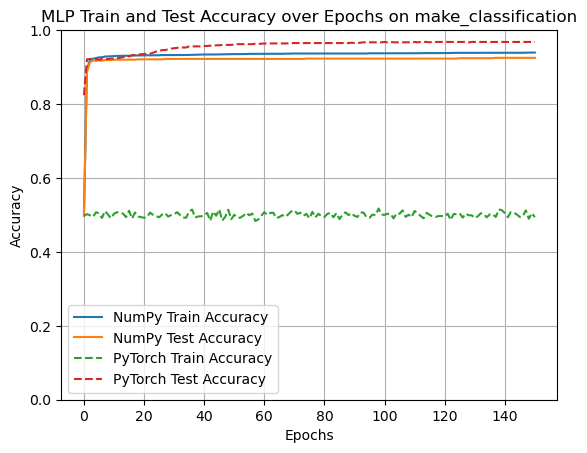

In [16]:
plt.figure()
plt.plot(train_acc_np, label='NumPy Train Accuracy')
plt.plot(test_acc_np, label='NumPy Test Accuracy')
plt.plot(train_acc_pt, label='PyTorch Train Accuracy', linestyle='--')
plt.plot(test_acc_pt, label='PyTorch Test Accuracy', linestyle='--')
plt.title('MLP Train and Test Accuracy over Epochs on make_classification')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

## Task 3

In [17]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from Task3 import MLP as CIFARMLP
from Task3 import train as train_cifar

In [18]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = datasets.CIFAR10(root='../data', train=True,
                                        download=True, transform=transform)
testset = datasets.CIFAR10(root='../data', train=False,
                                       download=True, transform=transform)
train_loader = DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
model = CIFARMLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 50
eval_freq = 5

train_loss_cifar, train_acc_cifar, test_loss_cifar, test_acc_cifar = train_cifar(
    model, train_loader, test_loader, criterion, optimizer, epochs, eval_freq)

print(f'Accuracy on CIFAR-10 dataset - Train Accuracy: {train_acc_cifar[-1]:.4f}, Test Accuracy: {test_acc_cifar[-1]:.4f}')

Epoch 0, Train Loss: 1.8812, Train Accuracy: 0.3226, Test Loss: 1.6671, Test Accuracy: 0.4085
Epoch 5, Train Loss: 1.6505, Train Accuracy: 0.4162, Test Loss: 1.5159, Test Accuracy: 0.4746
Epoch 10, Train Loss: 1.5795, Train Accuracy: 0.4476, Test Loss: 1.5116, Test Accuracy: 0.4698
Epoch 15, Train Loss: 1.5278, Train Accuracy: 0.4651, Test Loss: 1.4864, Test Accuracy: 0.4794
Epoch 20, Train Loss: 1.4810, Train Accuracy: 0.4804, Test Loss: 1.4912, Test Accuracy: 0.4870
Epoch 25, Train Loss: 1.4525, Train Accuracy: 0.4922, Test Loss: 1.4687, Test Accuracy: 0.4932
Epoch 30, Train Loss: 1.4247, Train Accuracy: 0.5037, Test Loss: 1.4395, Test Accuracy: 0.4995
Epoch 35, Train Loss: 1.4000, Train Accuracy: 0.5164, Test Loss: 1.4396, Test Accuracy: 0.5015
Epoch 40, Train Loss: 1.3640, Train Accuracy: 0.5275, Test Loss: 1.4379, Test Accuracy: 0.4983
Epoch 45, Train Loss: 1.3564, Train Accuracy: 0.5309, Test Loss: 1.4486, Test Accuracy: 0.4885
Epoch 50, Train Loss: 1.3413, Train Accuracy: 0.5389

In [12]:
plt.figure()
plt.plot(train_loss_cifar, label='Train Loss')
plt.plot(test_loss_cifar, label='Test Loss')
plt.title('MLP Train and Test Loss over Epochs on CIFAR10')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
plt.figure()
plt.plot(train_acc_cifar, label='Train Accuracy')
plt.plot(test_acc_cifar, label='Test Accuracy')
plt.title('MLP Train and Test Accuracy over Epochs on CIFAR10')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()